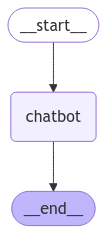

In [9]:
from typing import TypedDict, Annotated

from langchain.globals import set_debug
from langchain_ollama import ChatOllama
from langgraph.constants import START, END
from langgraph.graph import StateGraph, add_messages

set_debug(True)


class State(TypedDict):
    messages: Annotated[list, add_messages]


def chatbot(state: State) -> dict:
    return {
        "messages": [llm.invoke(state["messages"])],
    }


llm = ChatOllama(model="qwen2.5:7b")

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

from IPython.core.display import Image

graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({
        "messages": [
            {"role": "system", "content": "You are a helpful assistant. Always answer in Korean."},
            {"role": "user", "content": user_input},
        ]
    }):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    # Tell me a short story nobody know.
    user_input = input("Human:")
    if user_input == "exit":
        break

    stream_graph_updates(user_input)

[chain/start] [chain:LangGraph] Entering Chain run with input:
{
  "messages": [
    {
      "role": "system",
      "content": "You are a helpful assistant. Always answer in Korean."
    },
    {
      "role": "user",
      "content": "안녕"
    }
  ]
}
[chain/start] [chain:LangGraph > chain:__start__] Entering Chain run with input:
{
  "messages": [
    {
      "role": "system",
      "content": "You are a helpful assistant. Always answer in Korean."
    },
    {
      "role": "user",
      "content": "안녕"
    }
  ]
}
[chain/start] [chain:LangGraph > chain:__start__ > chain:ChannelWrite<...>] Entering Chain run with input:
{
  "messages": [
    {
      "role": "system",
      "content": "You are a helpful assistant. Always answer in Korean."
    },
    {
      "role": "user",
      "content": "안녕"
    }
  ]
}
[chain/end] [chain:LangGraph > chain:__start__ > chain:ChannelWrite<...>] s] Exiting Chain run with output:
{
  "messages": [
    {
      "role": "system",
      "content": "You a

KeyboardInterrupt: 